In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
data = pd.read_csv("./cleaned/usdrub.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)

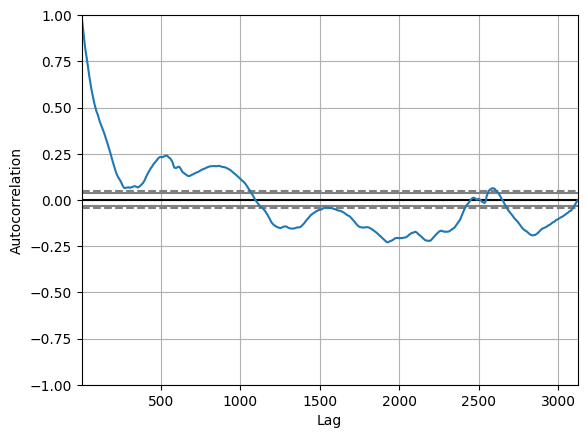

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data["close"])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3122
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4733.765
Date:                Tue, 23 Apr 2024   AIC                           9479.531
Time:                        04:08:41   BIC                           9515.806
Sample:                             0   HQIC                          9492.553
                               - 3122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0043      0.005      0.845      0.398      -0.006       0.014
ar.L2         -0.0164      0.005     -3.157      0.002      -0.027      -0.006
ar.L3          0.0796      0.006     13.721      0.0

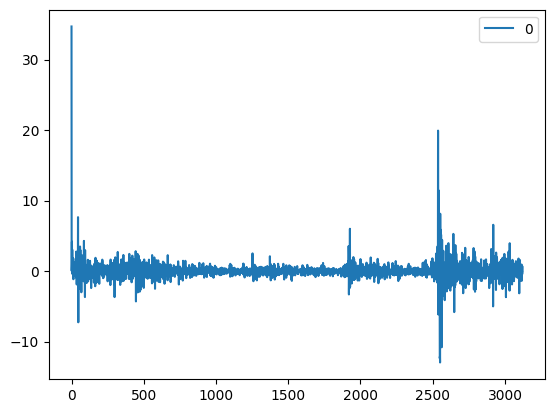

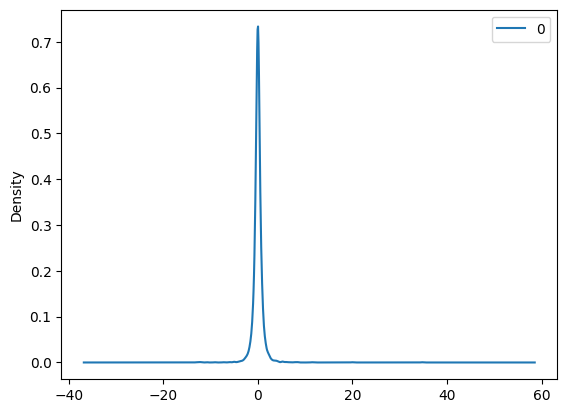

                 0
count  3122.000000
mean      0.025893
std       1.265489
min     -12.970729
25%      -0.310287
50%       0.004737
75%       0.320892
max      34.710200


In [8]:
series = data['close']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

0
predicted=95.574892, expected=96.126000
1
predicted=95.946379, expected=95.869000
2
predicted=95.972837, expected=96.418700
3
predicted=96.590785, expected=95.385000
4
predicted=95.416583, expected=96.851000
5
predicted=96.940094, expected=96.740000
6
predicted=96.639725, expected=98.395700
7
predicted=98.500942, expected=98.492800
8
predicted=98.507882, expected=96.750000
9
predicted=96.892314, expected=97.902000
10
predicted=98.048625, expected=94.330000
11
predicted=94.151998, expected=95.948900
12
predicted=96.048075, expected=95.213000
13
predicted=94.891670, expected=96.269200
14
predicted=96.264560, expected=95.780000
15
predicted=95.710967, expected=96.726000
16
predicted=96.821894, expected=95.944900
17
predicted=95.923948, expected=97.495400
18
predicted=97.592107, expected=96.018100
19
predicted=95.959140, expected=95.080000
20
predicted=95.203304, expected=95.280000
21
predicted=95.244608, expected=94.630000
22
predicted=94.490471, expected=95.843200
23
predicted=95.80332

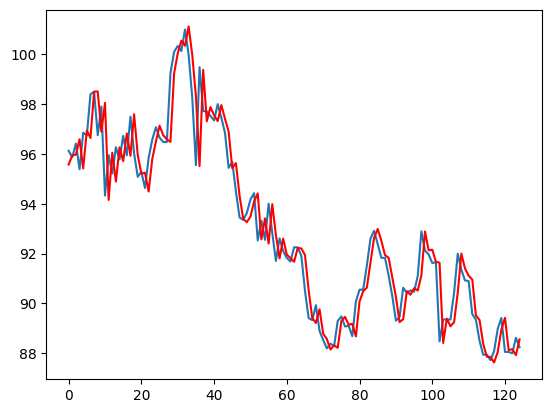

In [24]:
# Rolling Forecast
df_train, df_test = train_test_split(series, train_size = 0.96, test_size = 0.04, shuffle=False)
history = [x for x in df_train]
predictions = list()
# walk-forward validation
df_test.reset_index(drop=True, inplace=True)
for t in range(len(df_test)):
 print(t)
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = df_test[t]
 
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(df_test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(df_test)
plt.plot(predictions, color='red')
plt.show()



In [25]:
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  train_size = int(len(X) * 0.96)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
  return error

In [52]:
df_train, df_test = train_test_split(series, train_size = 0.66, test_size = 0.34, shuffle=False)
df_test.reset_index(drop=True, inplace=True)
model = ARIMA(df_train, order=(0,0,0), trend='ct')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2060
Model:                          ARIMA   Log Likelihood               -6460.335
Date:                Tue, 23 Apr 2024   AIC                          12926.670
Time:                        05:08:45   BIC                          12943.561
Sample:                             0   HQIC                         12932.863
                               - 2060                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3291      0.190    313.065      0.000      58.958      59.701
x1             0.0036      0.000     17.447      0.000       0.003       0.004
sigma2        31.0095      0.782     39.643      0.0

In [53]:
print(model_fit.resid)

0      -24.622558
1      -24.586376
2      -23.629994
3      -19.456311
4      -19.375129
          ...    
2055     6.078395
2056     6.190977
2057     6.867259
2058     6.246042
2059     6.377324
Length: 2060, dtype: float64
